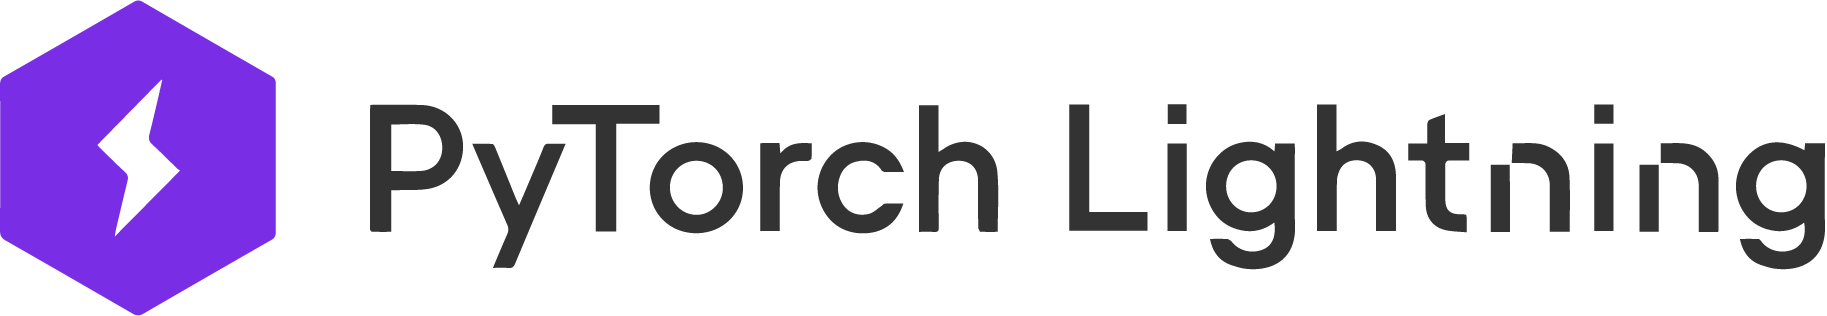

Run in yourown colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/huanchen1107/2022_DRL/blob/stage-1---environment-setup/2_9_dqn_pytorch_lightning_tensorboardOK_moreComments.ipynb)

###2.1 Setup Environment

In [1]:
!apt-get install -y xvfb


!pip install gym==0.21 gym[box2d] pytorch-lightning==1.6.0 pyvirtualdisplay
# !pip install https://github.com/PyTorchLightning/pytorch-lightning/archive/refs/heads/release/1.5.x.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 0s (1,824 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

#### Setup virtual display

In [2]:
from pyvirtualdisplay import Display
Display(visible=False, size=(1400, 900)).start()

#### Import the necessary code libraries

In [3]:
import copy
import gym
import torch
import random

import numpy as np
import torch.nn.functional as F

from collections import deque, namedtuple
from IPython.display import HTML
from base64 import b64encode

from torch import Tensor, nn
from torch.utils.data import DataLoader
from torch.utils.data.dataset import IterableDataset
from torch.optim import AdamW

from pytorch_lightning import LightningModule,Trainer

from gym.wrappers import RecordVideo, RecordEpisodeStatistics, TimeLimit

from pytorch_lightning.callbacks import EarlyStopping




device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
num_gpus = torch.cuda.device_count()

In [4]:
def display_video(episode=0):
  video_file = open(f'/content/videos/rl-video-episode-{episode}.mp4', "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"<video width=600 controls><source src='{video_url}'></video>")

#### 2.2 Create the Deep Q-Network

#### 2.3 Create the policy

#### 2.4 Create the replay buffer

#### 2.5 Create the environment
* Reinforcement Learning(强化学习)-LunarLander-v2 环境介绍
https://mathpretty.com/14212.html

* LunarLander-v2 环境介绍
  * Obs 与 Action 介绍
  * 该环境共有 8 个观测值（obs），分别是：
  水平坐标 x； 垂直坐标 y；水平速度；垂直速度；角度；角速度；腿1触地；腿2触地；

* Agent 可以采取四种离散的行动，分别是：
  * 0 代表不采取任何行动 
  * 2 代表主引擎向下喷射 
  * 1,3 则是向左右喷射
* Reward 介绍
「环境」给予的 reward 大致是这样计算：
  * 小艇坠毁得到 -100 分；
  * 小艇在黄旗帜之间成功着地则得 100~140 分；
  * 喷射主引擎（向下喷火）每次 -0.3 分；
  * 小艇最终完全静止则再得 100 分；
  * 「腿 1」或是「腿 2」都能获得 10 分；

```python 
#(初始環境互動)
import gym
env = gym.make('LunarLander-v2')
# 初始化环境
initial_state = env.reset()
print(initial_state)
# 随机选择一个与环境交互
random_action = env.action_space.sample()
print(random_action)
observation, reward, done, info = env.step(random_action)
print(observation, reward)

```

```python
#使用隨機策略控制
import gym
env = gym.make('LunarLander-v2')
# 初始化环境
initial_state = env.reset()
print(initial_state)
# 随机选择一个与环境交互
random_action = env.action_space.sample()
print(random_action)
observation, reward, done, info = env.step(random_action)
print(observation, reward)
```


In [5]:
# (初始環境互動)
import gym
env = gym.make('Acrobot-v1')
# 初始化环境
initial_state = env.reset()
print(initial_state)
# 随机选择一个与环境交互
random_action = env.action_space.sample()
print(random_action)
observation, reward, done, info = env.step(random_action)
print(observation, reward)

[ 0.9952351  -0.09750429  0.9985249   0.05429558  0.08661725 -0.0444509 ]
2
[ 0.9966787  -0.08143412  0.9978219   0.06596474  0.07193179  0.16159761] -1.0


In [6]:
# 使用隨機策略控制
import gym
env = gym.make('Acrobot-v1')
# 初始化环境
initial_state = env.reset()
print(initial_state)
# 随机选择一个与环境交互
random_action = env.action_space.sample()
print(random_action)
observation, reward, done, info = env.step(random_action)
print(observation, reward)

[ 0.9990738   0.04302943  0.99986374  0.01650564 -0.08103206 -0.05952041]
2
[ 0.9999572   0.00924896  0.9991579   0.04103034 -0.24903938  0.29494292] -1.0


In [8]:
def create_environment(name):
  env=gym.make(name)
  env=TimeLimit(env, max_episode_steps=400)
  record_interval=100
  env=RecordVideo(env, video_folder='./videos',episode_trigger=lambda x: x% record_interval==0)
  env=RecordEpisodeStatistics(env)
  return env

action_space_n= 3


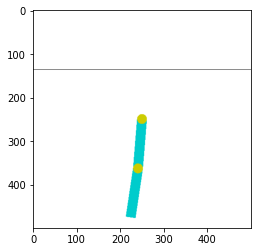

In [9]:
env=create_environment('Acrobot-v1')
env.reset()
#testing
env.observation_space.sample()
env.action_space.sample()
print("action_space_n=",env.action_space.n)

import matplotlib.pyplot as plt
plt.imshow(env.render(mode='rgb_array'))



#### 2.6 Create the test/sampling function

In [10]:
purge=1
if purge:
  !rm -r /content/lightning_logs/
  !rm -r /content/videos/


rm: cannot remove '/content/lightning_logs/': No such file or directory


In [13]:
env2=create_environment('Acrobot-v1')
epochs=2
for episode in range(epochs):
  env2.reset()
  print('*',end="")
  done = False
  while not done:
    action=env2.action_space.sample()
    _,_,done,_, =env2.step(action)

**

In [14]:

display_video(episode=0)


#### 2.7 Create the Deep Q-Learning algorithm

#### 2.8 Purge logs and run the visualization tool (Tensorboard)

In [ ]:


#執行階段類型須選擇GPU否則不會有值
!rm -r /content/lightning_logs/
!rm -r /content/videos/
%load_ext tensorboard
# %reload_ext tensorboard

# %tensorboard --logdir /content/lightning_logs/ --bind_all

%tensorboard --logdir /content/lightning_logs/ --bind_all


#### Train the policy

#### Check the resulting policy